# Enunciado
Uma operadora de seguro de saúde identificou que as variáveis de peso e nível de colesterol influenciam no desenvolvimento de doenças card í acas. Pensando isso, faz se necessário identificar os perfis de pessoas com maior risco a saúde e delimitar os limites entre os grupos de risco.
A operadora de seguro de saúde identificou 4 grande grupos:
1. Alto Risco
2. Risco Moderado alto
3. Risco Moderado baixo
4. Baixo risco

> Para alcançar este objetivo, vamos utilizar o modelo agrupamento pelo algoritmo das K-Means.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as po
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Extração

In [2]:
bas_estados = pd.read_csv('etl_saude_estados.csv', sep = ';', encoding = 'latin-1')

In [3]:
bas_clientes = pd.read_excel('etl_saude_clientes.xlsx')

In [4]:
bas_idades = pd.read_csv('etl_saude_idade.csv', sep = ';', encoding = 'latin-1')

In [5]:
bas_estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [6]:
bas_estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [7]:
bas_estados.info()
bas_estados.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [8]:
bas_clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102,111,Masculino,23
1,2,115,135,Masculino,7
2,3,115,136,Masculino,4
3,4,140,167,Feminino,24
4,5,130,158,Masculino,26


In [9]:
bas_clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,547.000000,547.000000,547.000000
mean,274.00000,143.572212,170.433272,13.833638
std,158.04957,30.837275,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [10]:
bas_clientes.info()
bas_clientes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  547 non-null    int64 
 1   peso        547 non-null    int64 
 2   colesterol  547 non-null    int64 
 3   genero      547 non-null    object
 4   id_estado   547 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 21.5+ KB


id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [11]:
bas_idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [12]:
bas_idades.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


In [13]:
bas_idades.info()
bas_idades.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


id_cliente    0
idade         0
dtype: int64

# Transformação
## Opções para tratamento de nulos
1. Eliminação dos registros
2. Média dos valores (ex: média dos pesos dos clientes)
3. Mediana (valor central do grupo)

In [14]:
# ver registros com valores nulos
bas_estados.loc[bas_estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


In [15]:
# elimina registros que contém null na coluna do dataframe
# para essa base é desnecessária, pois não há nenhum registros com o campo nulo
# bas_clientes.dropna(subset = ['peso'], inplace = True)

In [16]:
print(f'Média: {bas_clientes.peso.mean():.1f} \nMediana: {bas_clientes.peso.median()}')

Média: 143.6 
Mediana: 140.0


In [17]:
# preenche valores null com média
# para essa base é desnecessária, pois não há nenhum registros com o campo nulo
# bas_clientes.peso.fillna(round(bas_clientes.peso.mean(), 2), inplace = True)

In [18]:
# preenche valores null com mediana
# para essa base é desnecessária, pois não há nenhum registros com o campo nulo
# bas_clientes.peso.fillna(round(bas_clientes.peso.median(), 2), inplace = True)

In [19]:
print(bas_estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


### Substituindo variável categórica

In [20]:
# preenche com 'Brasil' os registros com campo 'país' = nulo
bas_estados.pais.fillna('Brasil', inplace = True)

### Analisando agrupamentos de alguns dados coletados

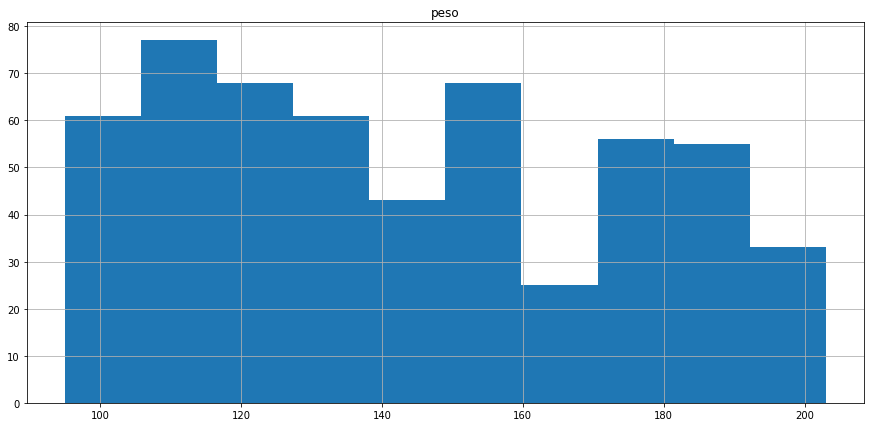

In [21]:
bas_clientes.hist(column = 'peso', figsize = (15, 7))
plt.show()

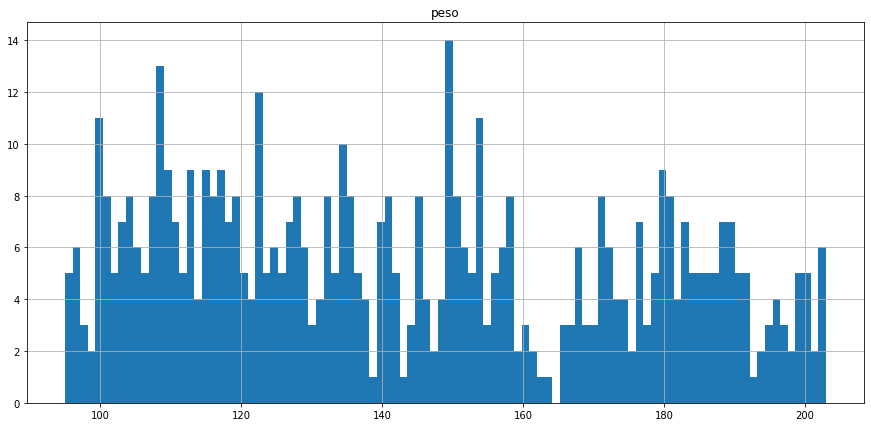

In [22]:
bas_clientes.hist(column = 'peso', figsize = (15, 7), bins = 100)
plt.show()

In [23]:
le = LabelEncoder()
bas_clientes['genero_numerico'] = le.fit_transform(bas_clientes['genero'])

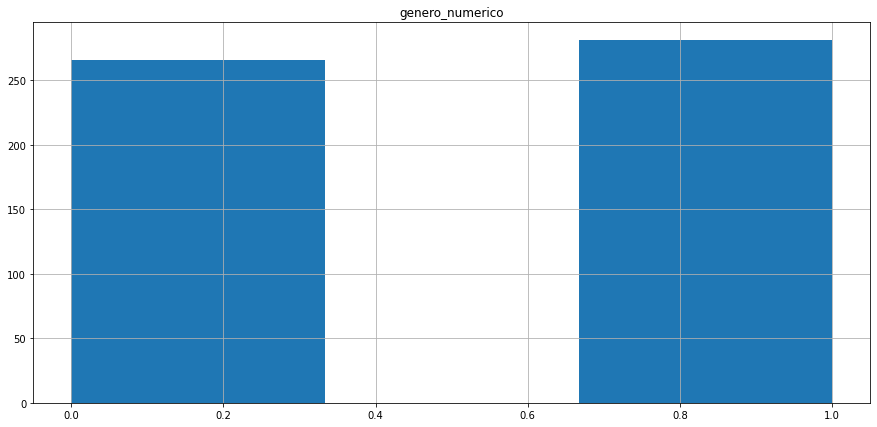

In [24]:
bas_clientes.hist(column = 'genero_numerico', figsize = (15, 7), bins = 3)
plt.show()

# Juntando dados

In [25]:
bas_clientes.head()

,id_cliente,peso,colesterol,genero,id_estado,genero_numerico
0,1,102,111,Masculino,23,1
1,2,115,135,Masculino,7,1
2,3,115,136,Masculino,4,1
3,4,140,167,Feminino,24,0
4,5,130,158,Masculino,26,1


In [26]:
bas_estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [27]:
bas_merge = pd.merge(pd.merge(bas_clientes, bas_estados, on = 'id_estado'), bas_idades, on = 'id_cliente').sort_values('id_cliente')
bas_merge.reset_index(drop = True, inplace = True)
bas_merge.rename(columns = {'id_cliente': 'cod_cliente', 'genero_numerico' : 'cod_genero'}, inplace = True)
bas_merge['sigla_estado'] = bas_merge.sigla_estado.str.upper()

In [28]:
bas_completa = bas_merge[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]
bas_completa.head()

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130,158,26,Sergipe,SE,Brasil


# Analisando dados

In [29]:
def calcular_wcss(dados):
  wcss = []
  for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(dados)
    wcss.append(km.inertia_)
  return wcss

In [30]:
# bas_wcss = bas_completa[['peso', 'colesterol', 'idade']]
bas_wcss = bas_completa[['peso', 'colesterol']]
wcss_clientes = calcular_wcss(bas_wcss)

In [31]:
# Visualizar wcss
for i in range(len(wcss_clientes)):
	print(f'Cluster {i}: {wcss_clientes[i]}')

Cluster 0: 1355958.2120658138
Cluster 1: 330537.8292908253
Cluster 2: 139730.79982953472
Cluster 3: 81340.76189905511
Cluster 4: 53820.50788910783
Cluster 5: 37391.85985798884
Cluster 6: 27627.937264993234
Cluster 7: 22081.130003861785
Cluster 8: 17250.611546880336
Cluster 9: 14569.345943941289


In [32]:
gf = px.line(x = range(1, 11), y = wcss_clientes)
fg = go.Figure(gf)
fg.update_layout(
	title = 'Calculando o WCSS'
	, xaxis_title = 'Número de clusters'
	, yaxis_title = 'Valor do WCSS'
	, template = 'plotly_white')
fg.show()

In [33]:
n_clusters = 4
km = KMeans(n_clusters = n_clusters, random_state = 0)
bas_completa['cluster'] = km.fit_predict(bas_wcss)

# São agrupados 4 (n_clusters = 4) grupos para cada atributo. 
# Primeira coluna são os centróides de cada grupo por peso; a segunda por colesterol; 
# e a terceira por idade!
centroides_clusters = km.cluster_centers_

# cálculo do size
size = [7] * n_clusters

In [34]:
# # verão manual
# gf1 = px.scatter(x = bas_completa['peso'], y = bas_completa['colesterol'], color = bas_completa['cluster'])
# gf2 = px.scatter(x = centroides_clusters[:, 0], y = centroides_clusters[:, 1], size = size)
# fg = go.Figure(data = gf1.data + gf2.data)
# fg.update_layout(
# 	title = 'Análise Colesterol / Peso (' + str(n_clusters) + ' grupos)'
# 	, xaxis_title = 'Peso'
# 	, yaxis_title = 'Colesterol'
# 	, template = 'plotly_white')
# fg.show()

In [35]:
# versão função
def plotar_grafico(base, cent, x, y):
  gf1 = px.scatter(x = base[x], y = base[y], color = base['cluster'])
  gf2 = px.scatter(x = cent[:, list(bas_wcss.columns).index(x)], y = cent[:, list(bas_wcss.columns).index(y)], size = size)
  fg = go.Figure(data = gf1.data + gf2.data)
  title = 'Análise ' + y.title() + ' / ' + x.title() + '(' + str(n_clusters) + ' grupos)'
  fg.update_layout(title = title, xaxis_title = x.title(), yaxis_title = y.title(), template = 'plotly_white')
  fg.show()

In [36]:
plotar_grafico(bas_completa, centroides_clusters, 'peso', 'colesterol')

In [37]:
# plotar_grafico(bas_completa, centroides_clusters, 'idade', 'colesterol')
# # verificar que não existe relação
# # necessário incluir o campo 'idade' na base_wcss

# Segmentar
Alto Risco; 
Risco Moderado alto; 
Risco Moderado baixo; 
Baixo risco; 


In [38]:
# seguimentando com base na análise de cluster
idx = bas_completa.groupby(['cluster']).mean().sort_values('colesterol', ascending = False).index
bas_completa.loc[bas_completa['cluster'] == idx[0], 'cluster_nome'] = 'Alto Risco'
bas_completa.loc[bas_completa['cluster'] == idx[1], 'cluster_nome'] = 'Risco Moderado alto'
bas_completa.loc[bas_completa['cluster'] == idx[2], 'cluster_nome'] = 'Risco Moderado baixo'
bas_completa.loc[bas_completa['cluster'] == idx[3], 'cluster_nome'] = 'Baixo risco'

In [39]:
# verifica agrupamento por idade
bas_completa.groupby('cluster_nome')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_nome,,,,,,,,
Alto Risco,154.0,42.727273,15.279219,16.0,31.25,42.0,56.0,69.0
Baixo risco,140.0,43.192857,15.514624,17.0,30.00,41.5,58.0,70.0
Risco Moderado alto,118.0,43.000000,15.568981,16.0,29.25,44.0,55.0,70.0
Risco Moderado baixo,135.0,42.266667,14.425930,16.0,29.50,42.0,54.0,70.0


In [40]:
# agrupa risco por estado
bas_completa.groupby(['cluster', 'cluster_nome'])['estado'].describe()

,,count,unique,top,freq
cluster,cluster_nome,,,,
0,Risco Moderado alto,118,27,Pernambuco,7
1,Alto Risco,154,27,Rio Grande do Sul,10
2,Risco Moderado baixo,135,27,Sergipe,9
3,Baixo risco,140,27,Amazonas,10


In [41]:
# apresenta os casos de Alto Risco do estado com mais casos
bas_completa.query('cluster_nome == "Alto Risco" & estado == "Rio Grande do Sul"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,cluster_nome
68,69,Feminino,35,187,221,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
105,106,Masculino,56,179,216,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
260,261,Masculino,34,171,205,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
312,313,Masculino,33,169,204,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
334,335,Masculino,68,182,222,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
372,373,Feminino,38,194,224,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
373,374,Masculino,18,177,214,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
375,376,Masculino,50,172,205,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
402,403,Feminino,45,175,215,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco
408,409,Masculino,19,180,219,21,Rio Grande do Sul,RS,Brasil,1,Alto Risco


In [42]:
bas_completa.groupby(['cluster_nome', 'genero'])['peso'].describe()

count        mean        std    min     25%  \
cluster_nome         genero                                                   
Alto Risco           Feminino    63.0  186.190476   8.023870  168.0  180.50   
                     Masculino   91.0  183.021978  10.726890  167.0  173.00   
Baixo risco          Feminino    64.0  108.203125   6.335037   96.0  103.25   
                     Masculino   76.0  105.710526   5.825955   95.0  101.75   
Risco Moderado alto  Feminino    66.0  152.000000   7.287502  140.0  145.00   
                     Masculino   52.0  152.211538   6.607591  140.0  148.00   
Risco Moderado baixo Feminino    73.0  129.438356   7.118025  116.0  124.00   
                     Masculino   62.0  125.709677   6.364314  115.0  120.25   

                                  50%    75%    max  
cluster_nome         genero                          
Alto Risco           Feminino   186.0  192.0  203.0  
                     Masculino  181.0  189.5  203.0  
Baixo risco          Feminino   109.5  113.0  118.0  
                     Masculino  105.0  110.0  118.0  
Risco Moderado alto  Feminino   154.0  157.0  169.0  
                     Masculino  151.0  154.0  168.0  
Risco Moderado baixo Feminino   129.0  135.0  142.0  
                     Masculino  125.5  131.0  140.0

In [43]:
# exportar para excel
bas_completa.to_excel('etl_saude_saida.xlsx')

# # exporta para csv
# bas_completa.to_csv('etl_saude_saida.csv', sep = ';', encoding = 'latin1')

In [44]:
# 8. Qual o valor do WCSS para o número de clusters = 4?
wcss_clientes[3]

81340.76189905511

In [45]:
# 9. Qual o valor do centroide para o grupo de alto risco? Leve em consideração 
# as variáveis na seguinte sequência: peso e colesterol.
centroides_clusters[
	bas_completa.groupby(['cluster']).mean().sort_values('colesterol', ascending = False).index[0]
]

array([184.31818182, 218.91558442])

In [46]:
# 10. Qual a média de idades para o cluster de Risco Moderado baixo?
# bas_completa.query(
# 	'cluster_nome == "Risco Moderado baixo"'
# ).groupby(['cluster_nome'])['idade'].describe()

bas_completa.query(
	'cluster_nome == "Risco Moderado baixo"'
)['idade'].mean()

42.266666666666666

In [47]:
# 11. Qual o valor máximo do colesterol coletado para o grupo de baixo Risco?
# bas_completa.query(
# 	'cluster_nome == "Baixo risco"'
# ).groupby(['cluster_nome'])['colesterol'].describe()

bas_completa.query(
	'cluster_nome == "Baixo risco"'
)['colesterol'].max()

138

In [48]:
# 12. Quantos valores nulos ou ausentes possuem na base de clientes?
bas_clientes.isna().sum()

id_cliente         0
peso               0
colesterol         0
genero             0
id_estado          0
genero_numerico    0
dtype: int64

In [49]:
# 13. Qual o estado com maior número de pessoas que estão no grupo de alto risco?
# bas_completa.query(
# 	'cluster_nome == "Alto Risco"'
# ).groupby(['estado'])['cluster_nome'].count().sort_values(ascending=False).head(1)
bas_completa.groupby(['cluster_nome'])['estado'].describe()

,count,unique,top,freq
cluster_nome,,,,
Alto Risco,154,27,Rio Grande do Sul,10
Baixo risco,140,27,Amazonas,10
Risco Moderado alto,118,27,Pernambuco,7
Risco Moderado baixo,135,27,Sergipe,9


In [50]:
# 14. Qual a média dos pesos para o grupo de risco moderado alto?
# bas_completa.query(
# 	'cluster_nome == "Risco Moderado alto"'
# ).groupby(['cluster_nome'])['peso'].describe()

bas_completa.query(
	'cluster_nome == "Risco Moderado alto"'
)['peso'].mean()

152.09322033898306

In [51]:
# 15. Responda a alternativa CORRETA:
# O grupo de alto risco, possui média maior de colesterol para o o gênero feminino em comparação ao gênero masculino.
# O desvio padrão para o grupo de risco moderado alto é de 9.19 para o gênero feminino.
# O grupo de baixo risco possui 76 pessoas do gênero feminino. 
bas_completa.groupby(['cluster_nome', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
cluster_nome         genero                                                   
Alto Risco           Feminino    63.0  220.873016   6.459532  204.0  217.00   
                     Masculino   91.0  217.560440   8.986668  204.0  211.00   
Baixo risco          Feminino    64.0  122.234375  10.219406  102.0  112.00   
                     Masculino   76.0  117.263158   9.557361  102.0  109.75   
Risco Moderado alto  Feminino    66.0  186.075758  10.573276  168.0  175.25   
                     Masculino   52.0  185.692308   9.194070  171.0  178.00   
Risco Moderado baixo Feminino    73.0  156.561644   9.797940  138.0  149.00   
                     Masculino   62.0  151.822581   9.290440  138.0  143.25   

                                  50%     75%    max  
cluster_nome         genero                           
Alto Risco           Feminino   221.0  225.00  235.0  
                     Masculino  218.0  225.00  235.0  
Baixo risco          Feminino   124.5  130.00  138.0  
                     Masculino  115.0  126.00  136.0  
Risco Moderado alto  Feminino   189.5  195.00  204.0  
                     Masculino  184.5  192.25  203.0  
Risco Moderado baixo Feminino   158.0  166.00  171.0  
                     Masculino  152.0  158.00  168.0